In [1]:
%pylab inline
# In this program I try and streamline the code we constructed in the notebook "coupled plasmids"


Populating the interactive namespace from numpy and matplotlib


params 1.0
CPU times: user 13min 56s, sys: 1.11 s, total: 13min 58s
Wall time: 13min 58s


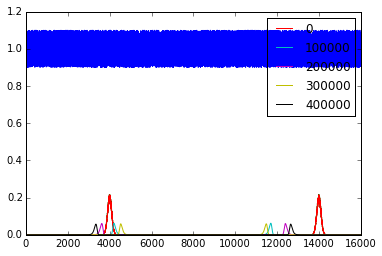

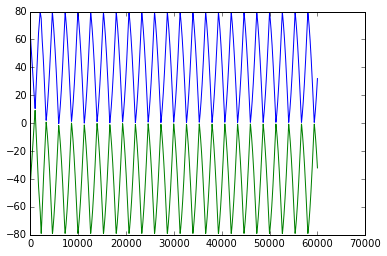

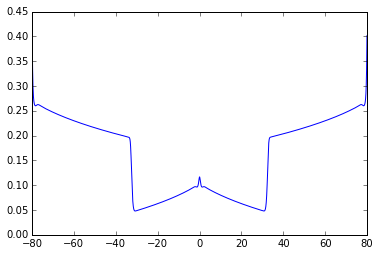

In [12]:
%%time
## Trying with a different method now:

L = 80
dx = 0.01
dt = 0.12

D = [1.0]#arange(.1,2.75,.05)   # open DNA - set to 1
dD = 0.1

A0 = .50     # free ParA
kon= 0.75    # rebinding rate

xs = arange(-L, L, dx)
Nu = len(xs)

gamma = 0.1

c = .5
vel = []

for D0 in D:
 print('params', D0)
 Ds = D0 + dD*2.0*(0.5-random.random(Nu))
 Ac = .50
 Am = zeros(Nu)
 Ab = zeros(Nu)
 Bt = 1.00
 t = 0.0
 ub = 60.0
 ub2 = -40.0
 ubs = [ub]
 ubs2 = [ub2]
 Acs = [Ac]
 ts = [t]
 check = []

 kon = .75
    #Equilibration
 for i in range(1000):
    Am += kon*Ac*(Ds - Am)*dt
    Ab += 0.001*Am*(Bt - trapz(Ab,xs))*exp(-.5*(xs-ub)**2.0) +0.001*Am*(Bt - trapz(Ab,xs))*exp(-.5*(xs-ub2)**2.0)
 figure(1)
 plot(Am)
 plot(Ab)

 kon = 0.0005
 for i in range(500000):
    # Force
    p_on = exp(-0.5*(xs-ub)**2/c/c) + exp(-0.5*(xs-ub2)**2/c/c)
    Ab_left = (Bt-trapz(Ab,xs))
    force1 = trapz(exp(-0.5*(xs-ub)**2.0)*(xs-ub)/sqrt(1. + (xs-ub)*(xs-ub))*Am*Ab_left, xs )
    force2 = trapz(exp(-0.5*(xs-ub2)**2.0)*(xs-ub2)/sqrt(1. + (xs-ub2)*(xs-ub2))*Am*Ab_left, xs )
     
    Ab += dt*(Ab_left*Am*p_on*Am  - gamma*Ab)
    Am += dt*(-Ab_left*Am*p_on*Am) +kon*Ac*0.5*dt
    
    #rem1 = exp(-0.5*(xs-ub)**2.0/c/c)*Am
    #add1 = Am*Am*(Bt - trapz(Ab,xs))*exp(-0.5*(xs-ub)**2.0)
    #Am += kon*Ac*(Ds - Am)*dt - rem1*dt - .001*add1*dt
    #Ab += add1*dt - 0.001*Ab
    if i %100000 ==0 :
        plot(Ab, label = i)
        legend()
        
    # update position
    ub += force1*dt
    ub2 += force2*dt
    ubs.append(ub)
    ubs2.append(ub2)
    t += dt
    ts.append(t)
 #p = polyfit(ts[-100:], ubs[-100:], 1)
 #vel.append(abs(p[0]))

 figure(2)
 plot(ts,ubs)
 plot(ts,ubs2)
#plot(D,vel,'ro-')
figure(3)
plot(xs,Am)

params 1.0
CPU times: user 14min 32s, sys: 1.51 s, total: 14min 34s
Wall time: 14min 35s


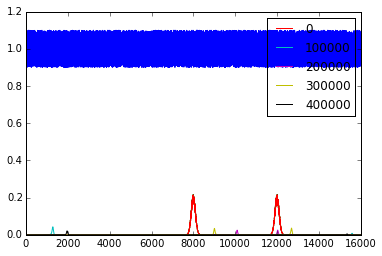

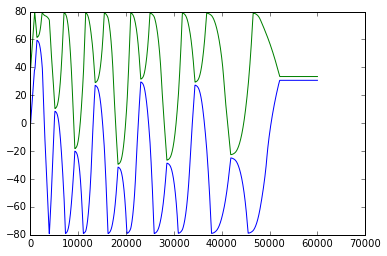

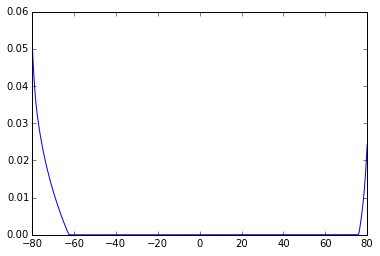

In [9]:
%%time
## Trying with a different method now:

L = 80
dx = 0.01
dt = 0.12

D = [1.0]#arange(.1,2.75,.05)   # open DNA - set to 1
dD = 0.1

A0 = .50     # free ParA
kon= 0.75    # rebinding rate

xs = arange(-L, L, dx)
Nu = len(xs)

gamma = 0.1

c = .5
vel = []

for D0 in D:
 print('params', D0)
 Ds = D0 + dD*2.0*(0.5-random.random(Nu))
 Ac = .50
 Am = zeros(Nu)
 Ab = zeros(Nu)
 Bt = 1.00
 t = 0.0
 ub = 0.0
 ub2 = 40.0
 ubs = [ub]
 ubs2 = [ub2]
 Acs = [Ac]
 ts = [t]
 check = []

 kon = .75
    #Equilibration
 for i in range(1000):
    Am += kon*Ac*(Ds - Am)*dt
    Ab += 0.001*Am*(Bt - trapz(Ab,xs))*exp(-.5*(xs-ub)**2.0) +0.001*Am*(Bt - trapz(Ab,xs))*exp(-.5*(xs-ub2)**2.0)
 figure(1)
 plot(Am)
 plot(Ab)

 kon = 0.0005
 for i in range(500000):
    # Force
    p_on = exp(-0.5*(xs-ub)**2/c/c) + exp(-0.5*(xs-ub2)**2/c/c)
    Ab_left = (Bt-trapz(Ab,xs))
    force1 = trapz(exp(-0.5*(xs-ub)**2.0)*(xs-ub)/sqrt(1. + (xs-ub)*(xs-ub))*Am*Ab_left, xs )
    force2 = trapz(exp(-0.5*(xs-ub2)**2.0)*(xs-ub2)/sqrt(1. + (xs-ub2)*(xs-ub2))*Am*Ab_left, xs )
     
    Ab += dt*(Ab_left*Am*p_on  - gamma*Ab)
    Am += dt*(-Ab_left*Am*p_on) +kon*Ac*0.5*dt
    
    #rem1 = exp(-0.5*(xs-ub)**2.0/c/c)*Am
    #add1 = Am*Am*(Bt - trapz(Ab,xs))*exp(-0.5*(xs-ub)**2.0)
    #Am += kon*Ac*(Ds - Am)*dt - rem1*dt - .001*add1*dt
    #Ab += add1*dt - 0.001*Ab
    if i %100000 ==0 :
        kon = kon - .0001
        plot(Ab, label = i)
        legend()
        
    # update position
    ub += force1*dt
    ub2 += force2*dt
    ubs.append(ub)
    ubs2.append(ub2)
    t += dt
    ts.append(t)
 #p = polyfit(ts[-100:], ubs[-100:], 1)
 #vel.append(abs(p[0]))

 figure(2)
 plot(ts,ubs)
 plot(ts,ubs2)
#plot(D,vel,'ro-')
figure(3)
plot(xs,Am)

In [7]:
kon

0.00029524499999999997

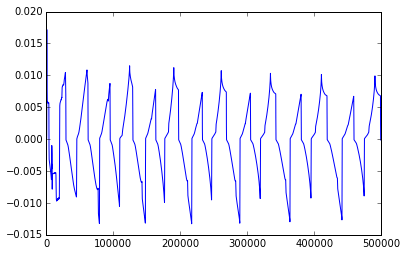

In [8]:
plot(gradient(ubs))